In [ ]:
import cv2
import os
import math
from matplotlib import pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import imutils
count = 0
orient = 32
th = 0.2
img1_point_list = list()
img2_point_list = list()
hist1_dict = dict()
hist2_dict = dict()
hist1_res = dict()
hist2_res = dict()
for i in range(orient):
  hist1_dict[i]=0
  hist2_dict[i]=0
# step3. 히스토그램 비교하면서 distance 계산하기 (img1의 4개의 점에 대해, img2에 모두의 점만 비교하면됨)
final_result = dict()
kernel = np.ones((9,9), np.uint8)
for file_nm_1 in os.listdir('./data/crop1/') :
    hist1_dict = dict()
    for i in range(orient):
      hist1_dict[i]=0
    if '.png' in file_nm_1 : 
        file_path_1 = os.path.join('./data/crop1/', file_nm_1)
        

        img1 = imread(file_path_1)
        img1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
        img1 = cv2.resize(img1, dsize=(100,100)).astype(np.uint8)
        
        img1 = cv2.equalizeHist(img1)
        img1 = cv2.morphologyEx(img1, cv2.MORPH_OPEN, kernel)
        # img1 = cv2.threshold(img1, 50, 255 , cv2.THRESH_BINARY)
        fd, hog_image = hog(img1, orientations=orient, pixels_per_cell=(11, 11),cells_per_block=(7, 7), visualize=True, block_norm='L2')

        for idx, val in enumerate(fd):
          if val >= th:
            hist1_dict[(idx%orient)]+=1
        
        # plt.bar(list(hist1_dict.keys()), hist1_dict.values(), color='g')
        # plt.show()
        hist1_res[file_nm_1] = hist1_dict
    else :
        continue
data2_dir = './data/crop2/'
for file_nm_2 in os.listdir(data2_dir) :
    
    hist2_dict = dict()
    for i in range(orient):
      hist2_dict[i]=0
    if '.png' in file_nm_2 :
        file_path = os.path.join(data2_dir, file_nm_2)
        img = imread(file_path)
        img = imutils.rotate(img, 45)  
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        img = cv2.resize(img, dsize=(100,100)).astype(np.uint8)
        img = cv2.equalizeHist(img)
        img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
        # img = cv2.threshold(img, 50,255 , cv2.THRESH_BINARY)
        fd, hog_image = hog(img, orientations=orient, pixels_per_cell=(11, 11),cells_per_block=(7, 7), visualize=True, block_norm='L2')

        for idx, val in enumerate(fd):
          if val >= th:
            hist2_dict[(idx%orient)]+=1
        
        # plt.bar(list(hist2_dict.keys()), hist2_dict.values(), color='g')
        # plt.show()
        hist2_res[file_nm_2] = hist2_dict
    else : 
      continue



{'1_cropped.png': {0: 9, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 6, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 23, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 1, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0}, '3_cropped.png': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 7, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 8, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 3, 24: 9, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0}, '2_cropped.png': {0: 16, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 9, 8: 9, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 9, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0}, '0_cropped.png': {0: 24, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 32, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0}}
0 23
0 9
0 16
0 32
{'1_cropped.png': {0: 0.391304347826087, 1: 

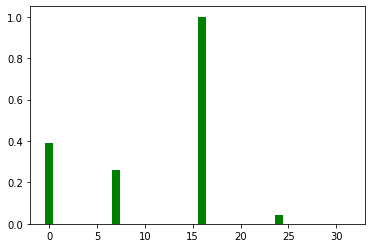

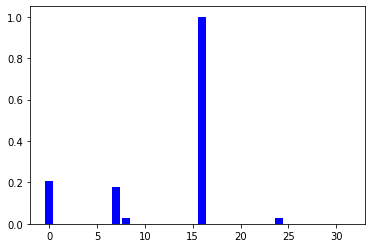

3_cropped.png


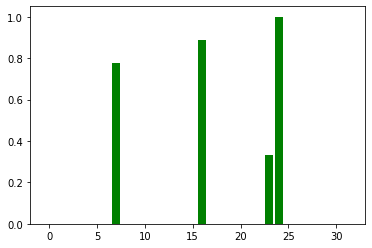

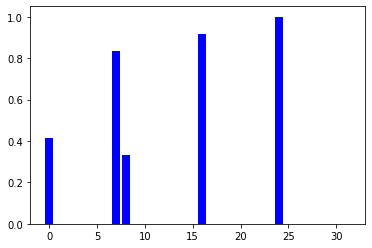

2_cropped.png


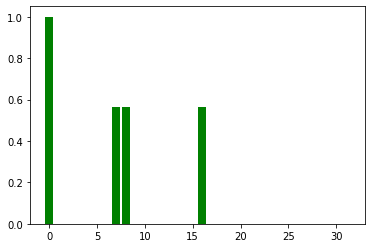

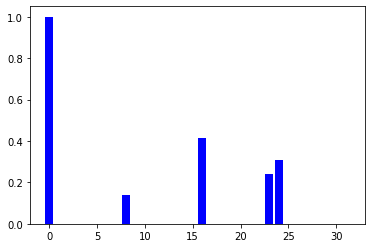

0_cropped.png


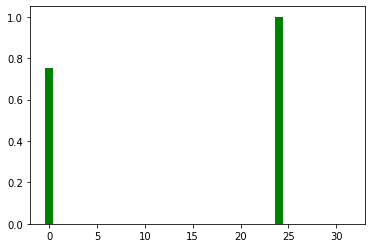

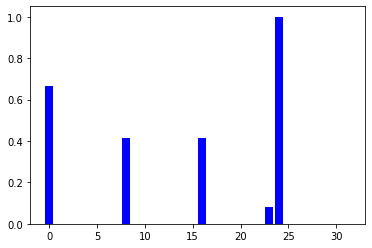

{'1_cropped.png': {0: 0.20588235294117646, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.17647058823529413, 8: 0.029411764705882353, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 1.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.029411764705882353, 25: 0.0, 26: 0.0, 27: 0.0, 28: 0.0, 29: 0.0, 30: 0.0, 31: 0.0}, '3_cropped.png': {0: 0.4166666666666667, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.8333333333333334, 8: 0.3333333333333333, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.9166666666666666, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.0, 24: 1.0, 25: 0.0, 26: 0.0, 27: 0.0, 28: 0.0, 29: 0.0, 30: 0.0, 31: 0.0}, '2_cropped.png': {0: 1.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.13793103448275862, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.41379310344827586, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.2413793103448276, 24: 0.31

In [ ]:


print(hist1_res)
for key, val in hist1_res.items():
  max =0
  min =1
  for k in val: 
    if max<val[k]:
      max = val[k]
    if min>val[k]:
      min =val[k]
  print(min, max)
  for k in val:
    val[k] = (val[k]-min)/(max-min)
print(hist1_res)

print(hist2_res)
for key, val in hist2_res.items():
  max =0
  min =1
  for k in val: 
    if max<val[k]:
      max = val[k]
    if min>val[k]:
      min =val[k]
  
  for k in val:
    val[k] = (val[k]-min)/(max-min)
print(hist2_res)

# print(hist2_res)
# for key, val in hist2_res.items():
#   sum =0
#   for k in val:
#     sum+=k
#   factor=1.0/sum
#   for k in val:
#     val[k] = val[k]*factor
# print(hist2_res)

for key, val in hist1_res.items():
  print(key)
  plt.bar(list(val.keys()), val.values(), color='g')
  plt.show()

  plt.bar(list(hist2_res[key].keys()), hist2_res[key].values(), color='b')
  plt.show()
print(hist2_res)
result = dict()
for file_nm_1, hist1_dict in hist1_res.items() :
  result[file_nm_1]=dict()
  for file_nm_2, hist2_dict in hist2_res.items():
    
  # distance 연산
    sum = 0
    for i in range(orient) :
        sum = sum + (hist1_dict[i]-hist2_dict[i]) ** 2

    dist = math.sqrt(sum)
    #print(f'-- Euclidean distance between {file_nm_1} and {file_nm_2} : ', dist)

    result[file_nm_1][file_nm_2] = dist
    # img1의 각 점에서 뭐가 매칭되는지 확인
  

print('#######################################')
print("result : ", result)
for file_nm_1, result_dict in result.items():

  tmp_result_sort = sorted(result[file_nm_1].items(), key = lambda item: item[1], reverse = False)
  print(f'-- {file_nm_1} : ', tmp_result_sort )
  print('-- closest point : ', tmp_result_sort[0])

  final_result[file_nm_1] = tmp_result_sort[0][0]
print()

# print('## Final result :', final_result)
